LangSmith is a **developer platform created by LangChain** to help you **build, debug, test, and monitor applications that use LLMs (Large Language Models)**.



Think of it as an **observability and evaluation layer for LLM apps**. While LangChain and LangGraph help you *build workflows*, LangSmith helps you *understand, test, and improve them*.

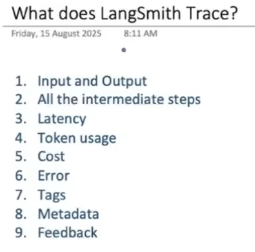

### Key Features of LangSmith:

1. **Tracing & Debugging**

   * Lets you log and visualize every step of your LLM application.
   * You can see prompts, model responses, tool calls, and intermediate states.
   * Makes it easier to debug why a model gave a certain output.



2. **Evaluation**

   * Run experiments on your LLM pipeline against test datasets.
   * Compare different prompts, models, or chains.
   * Supports both automated metrics (accuracy, BLEU, etc.) and human feedback.



3. **Monitoring & Analytics**

   * Tracks production usage of your app.
   * Collects latency, cost, and error stats.
   * Gives insights into how your app is performing in real-world usage.



4. **Dataset & Prompt Management**

   * Store and version prompts and datasets for experiments.
   * Helps ensure reproducibility when tweaking chains or models.



5. **Integration**

   * Works with LangChain, LangGraph, and even non-LangChain apps (via API).
   * You can integrate it into your existing MLops stack.

### ⚖️ Why It Matters

Normally, when working with LLMs, debugging is painful because prompts, chains, and model responses are dynamic and hard to reproduce.


LangSmith solves this by giving you a **centralized place to observe, test, and improve** your pipelines — from prototype to production.

🔑 In short: **LangSmith = “MLflow + Datadog, but for LLM apps.”**

* **LangChain/LangGraph** = *Frameworks to build LLM workflows*


* **LangSmith** = *Tool to test, debug, evaluate, and monitor those workflows*



## Observability




In **LangSmith**, **observability** means the ability to **see what’s happening inside your LLM app — in real time and historically** — so you can understand, debug, and improve it.

### 🔍 What Observability Covers in LangSmith

1. **Tracing**

   * Every request, response, and intermediate step (prompts, tool calls, retriever queries, etc.) is logged.
   * You can drill down into a single user request and see exactly how the system responded.



2. **Metrics & Monitoring**

   * Latency (how long responses take).
   * Error rates (failures, retries, tool errors).
   * Token usage (input/output token counts).
   * Model-level analytics (which LLM performed better).



3. **Debugging & Replay**

   * You can replay a run with the same inputs to reproduce issues.
   * Compare different model versions, prompt tweaks, or retriever configurations.



4. **Production Visibility**

   * Instead of treating your LLM app as a “black box,” LangSmith gives you dashboards to monitor its behavior in production.
   * Helps detect drift (e.g., if responses start degrading) and unexpected errors.

### ⚖️ Why Observability Matters

LLM apps are **non-deterministic** — the same input can give different outputs.
Without observability, you can’t:

* Understand why a user got a weird answer.
* Optimize prompts, chains, or retrievals.
* Monitor costs and latency.

LangSmith provides **end-to-end observability** → from dev → test → production.

👉 In short: **Observability in LangSmith = deep visibility into your LLM pipelines, so you can debug, monitor, and optimize them.**


## Project, Run, Trace

### 🔹 1. Project

* A **Project** is like a **folder/workspace** where all related LLM interactions are grouped.


* You usually create a project per app, experiment, or feature you’re testing.

👉 Example:

* `project = "customer_support_bot"`


* Inside it, you’ll have all the runs and traces for that bot.

📌 **Use it for:** Organizing work (like MLflow experiments).

### 🔹 2. Run

* A **Run** is a **single execution** of some component (LLM call, chain, agent, retriever, tool, etc.).


* Runs can be **nested** (e.g., one user query → chain run → retriever run → LLM run).

👉 Example:



* User asks: *“What’s the capital of France?”*

  * Parent run = Chain run (handles input/output).
  * Child run = LLM run (querying GPT-4).
  * Child run = Retriever run (fetching from docs).

📌 **Use it for:** Debugging → see what happened during one execution.

### 🔹 3. Trace : one single execution 

* A **Trace** is the **entire tree of runs** for one user request (all steps from start to finish).


* It’s like a call stack in programming: one top-level run, with nested child runs.



👉 Example:
Trace for the above query might look like:

```
Chain Run (id: 1)
 ├── Retriever Run (id: 2)
 └── LLM Run (id: 3)
```

📌 **Use it for:** Observability → inspect the full flow, replay it, or compare traces.

### 🛠️ How We Use Them in Practice

### Step 1: Create a Project

```python
from langsmith import Client
client = Client()

project = "customer_support_bot"
```

### Step 2: Log a Run

```python
from langsmith.run_helpers import traceable

@traceable  # makes function calls appear as runs
def get_answer(question: str):
    # imagine this calls an LLM
    return "The capital of France is Paris."

# This call creates a run under the given project
answer = get_answer("What’s the capital of France?")
```

### Step 3: Inspect in LangSmith

* Go to the LangSmith UI.
* You’ll see:

  * Project: `customer_support_bot`
  * Runs: one per function/LLM call
  * Trace: full execution tree for the question

✅ **Summary**

* **Project** = container (organizes your app/experiment).


* **Run** = one execution (can be parent/child).


* **Trace** = the full execution tree of a user request.